# HEADERS

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pan
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline 

In [3]:
learning_rate = 0.1
training_epochs = 1000
step_display = 100

# 1. DATA

### 1.1. Load Data

In [4]:
data = pan.read_csv('data/money.csv')

In [5]:
data[0 :5]

,X1,X2,X3,X4,Label1,Label2
0,-0.025314,-0.17383,-0.11339,1.21980,1,0
1,5.807000,5.00970,-2.23840,0.43878,0,1
2,-2.434900,-9.24970,8.99220,-0.50001,1,0
3,-1.693600,2.78520,-2.18350,-1.92760,1,0
4,0.636550,5.20220,-5.21590,-6.12110,1,0


### 1.2. Train data

In [6]:
x_train = data.loc[0:1000, ['X1', 'X2', 'X3', 'X4']].as_matrix()
y_train = data.loc[0:1000, ['Label1', 'Label2']].as_matrix()

### 1.3. Test data

In [7]:
x_test = data.loc[1001: len(data), ['X1', 'X2', 'X3', 'X4']].as_matrix()
y_test = data.loc[1001: len(data), ['Label1', 'Label2']].as_matrix()

# 2. BUILD GRAPH

### 2.1. Placholders

In [8]:
x = tf.placeholder(tf.float32, shape=[None, 4])
y = tf.placeholder(tf.float32, shape=[None, 2])

### 2.2. Weights and Biases

In [9]:
w = tf.Variable(tf.zeros([4, 2]))
b = tf.Variable(tf.zeros([2]))

### 2.3. Model

2.3.1. Layers

In [10]:
z = tf.matmul(x, w) + b
a = tf.sigmoid(z)

y_pred = tf.nn.softmax(a)

2.3.2. Cost function

In [11]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y * tf.log(y_pred),
                                              reduction_indices=[1]))

2.3.3. Optimizer

In [12]:
optimiser = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

# 3.SESSION

### 3.1. Start session

In [13]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

### 3.2. Training

In [14]:
costs = np.zeros(training_epochs+1)
for step in range(training_epochs+1):
    _, cost = sess.run([optimiser, cross_entropy], feed_dict={x : x_train, y: y_train})
    costs[step] = cost
    if step % step_display == 0 :
        print(step,'::', cost)

0 :: 0.693146
100 :: 0.407641
200 :: 0.384517
300 :: 0.373584
400 :: 0.366673
500 :: 0.361724
600 :: 0.357928
700 :: 0.354888
800 :: 0.35238
900 :: 0.350267
1000 :: 0.348458


### 3.3. Graphic display

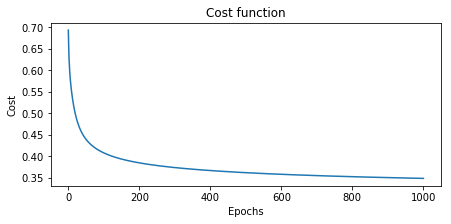

In [15]:
plt.figure(figsize=(7,3))
plt.plot(costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost function')

### 3.4. Compute accuracy

In [16]:
correct_prediction = tf.equal(tf.argmax(y_pred,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))*100
print ('Accuracy = {:05.2f}'.format(sess.run(accuracy,feed_dict={x: x_test, y:y_test})),'%')

Accuracy = 98.65 %
